# Biodiversity in National Parks
Biodiversity, the intricate web of life on Earth, is essential for the health and stability of ecosystems. National parks play a vital role in preserving and showcasing this biodiversity. As a testament to their importance, studying the biodiversity within these parks can provide crucial insights into the state of various species and their conservation needs. This project aims to delve into biodiversity within national parks, specifically focusing on the relationships between species, their conservation statuses, and the observation trends within these protected areas.

**Source of data:**
Data is provided in files `Observations.csv` and `Species_info.csv` by [Codecademy.com](https://www.codecademy.com).


## Scoping of the Project:
The project's scope encompasses two primary datasets: one detailing the taxonomy and conservation statuses of various species and another highlighting the observations of these species within different national parks. By merging these datasets, we can draw connections between species attributes, their observed frequencies, and their habitat locations.

### Project Goals:
The primary objectives of this data science project are as follows:

1. **Biodiversity Assessment:** To assess the biodiversity in different national parks, we will determine the number of unique species in each park based on the provided datasets.

2. **Conservation Status Analysis:** We will analyze the distribution of conservation statuses across various taxonomic categories. This analysis will shed light on which species groups require heightened conservation efforts.

3. **Observation Patterns:** We aim to identify the national parks with the highest observation counts by examining the observations recorded in the past seven days. This will help uncover the parks receiving the most attention from observers.

4. **Correlation of Observations and Conservation Status:** We will explore whether species with certain conservation statuses tend to receive more observations. This analysis could uncover whether species' conservation needs influence observation efforts.

### Raised Questions:
Throughout the project, the following questions will be addressed:

1. ***Based on the available data, what is the overall species richness in different national parks?***
- *Parks summaries*
- *Which national parks have the highest observation counts in the past seven days?*
- *How are observations distributed by parks?*
2. ***How are conservation statuses distributed across different taxonomic categories?***

3. ***Is there a relationship between species' conservation statuses and the number of observations they receive?***
- *Do species with a certain conservation status receive more observations in national parks?*
4. ***Taxonomy categories in observations: Do they significantly differ from the population?***
5. ***Can common names be associated with multiple scientific names, and if so, what implications might this have for biodiversity recording?***

By answering these questions, we intend to gain valuable insights into the status of biodiversity in national parks, the patterns of species observations, and the potential relationships between conservation statuses and observation efforts. This project will contribute to a better understanding of how biodiversity is being documented and conserved within these essential protected areas.

### Data

We have two files with datasets containing information about each species, their scientific and common names, taxonomy names, conservation status, and a number of observations in different national parks. We will analyze this data to reach the goals of the project.

### Analysis

This section will encompass a comprehensive data exploration, utilizing descriptive statistics and data visualization methods to gain deeper insights. Moreover, statistical inference will be applied to determine the statistical significance of the observed values. The analytical process will involve the computation of essential metrics aligned with our project goals, including:

1. Species Richness Distribution
2. Observation Counts
3. Relation of Conservation Status and Taxonomy
4. Observation and Conservation Status Correlation
5. Relation between species

Throughout the analysis, we will emphasize extracting meaningful patterns and insights contributing to our overarching project goals of assessing biodiversity, understanding observation trends, and exploring relationships between conservation statuses and observed species.

### Evaluation

In the final phase of our analysis, we will carefully evaluate the outcomes in light of our project's defined goals and the questions we initially aimed to address. This evaluation ensures that the insights extracted align with the objectives we set out to achieve, as outlined in the project goals section. We will discuss any limitations encountered during the analysis, highlighting factors that might have influenced the results or prevented a more comprehensive exploration. By conducting a thorough evaluation, we will ensure that our study aligns with our project's objectives and provides a broad perspective on the biodiversity within national parks, observation trends, and the relationships between species' conservation statuses and observation efforts.



## Loading the Data
Firstly we import the necessary libraries.
Then we read data from `csv` data files and load it to DataFrames `species` and `observations` respectfully.


In [33]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_1samp
from matplotlib import pyplot as plt
import seaborn as sns
import re

species = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

In [34]:
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [35]:
observations.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [36]:
print(f"Species shape: {species.shape}")
print(f"Observations shape: {observations.shape}")

Species shape: (5824, 4)
Observations shape: (23296, 3)


**Data structures**

Species data has 4 variables and 5,824 records. The observational data has 3 variables and 23,296 records. It should be noted that these data have the same variable  `scientific_name`, and can be merged on this basis.

Let's analyze the data structure.

In [37]:
cat_list = species.category.unique()
print("Categories of Taxonomy list: ", cat_list)

Categories of Taxonomy list:  ['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


Species data is divided into seven taxonomy categories; we will analyze the data distribution among these categories.

In [38]:
print(f"Unique Species in Species_info: {species.scientific_name.nunique()}")
print(f"Unique Species in Observations: {observations.scientific_name.nunique()}")
print(f"Duplicated Species in Species: {species[species.scientific_name.duplicated()].shape[0]}")
species.conservation_status.unique()

Unique Species in Species_info: 5541
Unique Species in Observations: 5541
Duplicated Species in Species: 283


array([nan, 'Species of Concern', 'Endangered', 'Threatened',
       'In Recovery'], dtype=object)

**Data tidying**

We observe that the number of unique species in both datasets is the same and equals 5,541. At the same time, the number of rows in the species dataset is 5,824, and the number of duplicates is 283. Assuming that the scientific name in the species catalogue should be unique, we need to remove extra records from this dataset.

How can we do this with the most minor damage for further analysis?

The most sensitive information is stored in the `conservation_status` variable column. First, we will replace empty values with the "Not protected" value, meaning that this species is not under exceptional control and protection and has no special conservation status. Next, we will change the type of this variable and make it Categorical ordered by degree of protection: ***'Not protected' < 'Species of Concern' < 'In Recovery' < 'Threatened' < 'Endangered'***.

We then sort the species data in ascending order for the `category` and `scientific_name` variables and descending order for the `conservation_status` and `common_names` variables. Thus, the duplicates in the data set will be arranged so that the most important ones in terms of conservation status and having a more extensive set of commonly used names will come first.

Finally, we will remove rows with duplicate values for the `scientific_name` variable.


In [39]:
species.conservation_status.fillna('Not protected', inplace=True)
species.conservation_status = pd.Categorical(species.conservation_status,
                                             categories=['Not protected', 'Species of Concern', 'In Recovery', 'Threatened', 'Endangered'],
                                             ordered=True)
species.sort_values(by=['category', 'scientific_name', 'conservation_status', 'common_names'],
                    ascending=[True, True, False, False],
                    inplace=True)
species.drop_duplicates(subset=['scientific_name'], inplace=True)
print(f"Species shape after tidying: {species.shape}")

Species shape after tidying: (5541, 4)


The number of columns of both data sets is relatively small, so we will combine these sets into one for further work and continue our analysis. Let's name the new data frame **mdf** and look at the summary information about the structure of this dataset.

In [40]:
mdf=observations.merge(species, on='scientific_name')
mdf.head(10)

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not protected
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not protected
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not protected
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not protected
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Not protected
5,Neovison vison,Yellowstone National Park,218,Mammal,American Mink,Not protected
6,Neovison vison,Bryce National Park,91,Mammal,American Mink,Not protected
7,Neovison vison,Yosemite National Park,200,Mammal,American Mink,Not protected
8,Prunus subcordata,Yosemite National Park,138,Vascular Plant,Klamath Plum,Not protected
9,Prunus subcordata,Yellowstone National Park,217,Vascular Plant,Klamath Plum,Not protected


In [41]:
mdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23296 entries, 0 to 23295
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   scientific_name      23296 non-null  object  
 1   park_name            23296 non-null  object  
 2   observations         23296 non-null  int64   
 3   category             23296 non-null  object  
 4   common_names         23296 non-null  object  
 5   conservation_status  23296 non-null  category
dtypes: category(1), int64(1), object(4)
memory usage: 1.1+ MB


The data set has 23,296 entries, no nulls, and the data types are as expected for each variable. For convenience, let's add a new boolean type variable indicating whether this specie has a conservation status. Let's name this variable `protected`.

In [42]:
mdf['protected'] = mdf.conservation_status != 'Not protected'

At the end of this data preparation section, we will list the unique names of the National Parks that have provided information on observations of various species. 

In [43]:
print(f"Unique Parks in Dataframe: {mdf.park_name.unique()}")

Unique Parks in Dataframe: ['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Yellowstone National Park' 'Bryce National Park']


We have information about four National Parks. For convenience and compactness of visualizations, we will reduce the phrase ***"National Park"*** in each name to the abbreviation ***"NP"***.

In [44]:
mdf.park_name = mdf.park_name.apply(lambda x: x[:-13]+'NP')
park_list = mdf.park_name.unique()
print("Park list: ", park_list)

Park list:  ['Great Smoky Mountains NP' 'Yosemite NP' 'Yellowstone NP' 'Bryce NP']


**Finally, our data is loaded, cleaned, merged for convenience and ready for analysis.**

## Analysis

We analyze the data and try to answer the questions raised above. We will move in the order of these questions.

### 1. Based on the available data, what is the overall species richness in different national parks?
- *Parks summaries*
- *Which national parks have the highest observation counts in the past seven days?*
- *How are observations are distributed by parks?*

In [45]:
obs_total = mdf.observations.sum()
obs_protected_total = mdf[mdf.protected].observations.sum()
print("The total number of observations: ", obs_total)
print("The total number of observations for protected species: ", obs_protected_total)
print("The ratio of protected species observations (%): ", np.round(obs_protected_total*100.0/obs_total, 2))
parks_summary = pd.DataFrame()
parks_summary['species'] = mdf.groupby(mdf.park_name).scientific_name.nunique()
parks_summary['species_protected'] = mdf[mdf.protected].groupby(mdf.park_name).scientific_name.nunique()
parks_summary['observations'] = mdf.groupby(mdf.park_name).observations.sum()
parks_summary['ratios'] = np.round(parks_summary.observations*100.0/obs_total,2)
parks_summary['observations_protected'] = mdf[mdf.protected].groupby(mdf.park_name).observations.sum()
parks_summary['ratios_protected'] = np.round(parks_summary.observations_protected*100.0/obs_protected_total,2)
parks_summary


The total number of observations:  3314739
The total number of observations for protected species:  90108
The ratio of protected species observations (%):  2.72


,species,species_protected,observations,ratios,observations_protected,ratios_protected
park_name,,,,,,
Bryce NP,5541,179,576025,17.38,16263,18.05
Great Smoky Mountains NP,5541,179,431820,13.03,11277,12.51
Yellowstone NP,5541,179,1443562,43.55,39035,43.32
Yosemite NP,5541,179,863332,26.05,23533,26.12


<Figure size 1400x1200 with 0 Axes>

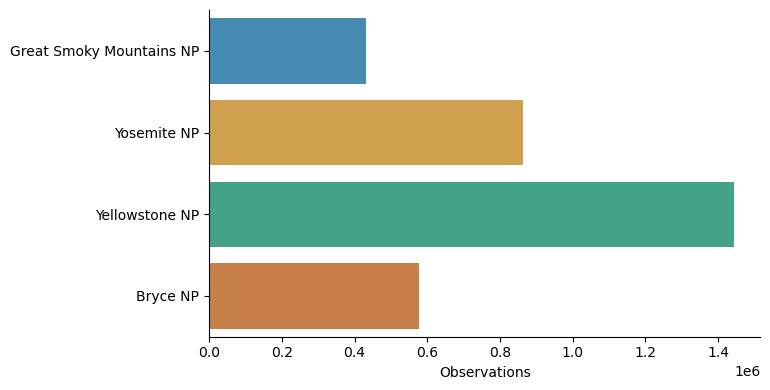

<Figure size 640x480 with 0 Axes>

In [46]:
plt.figure(figsize=(14,12))
g = sns.catplot(
    data=mdf, kind="bar", estimator='sum',
    x='observations', y='park_name', errorbar=None, orient='h', palette='colorblind', alpha=.8, height=4, aspect=2)
g.set_axis_labels("Observations", "")
plt.show()
plt.clf()

<Figure size 1400x1200 with 0 Axes>

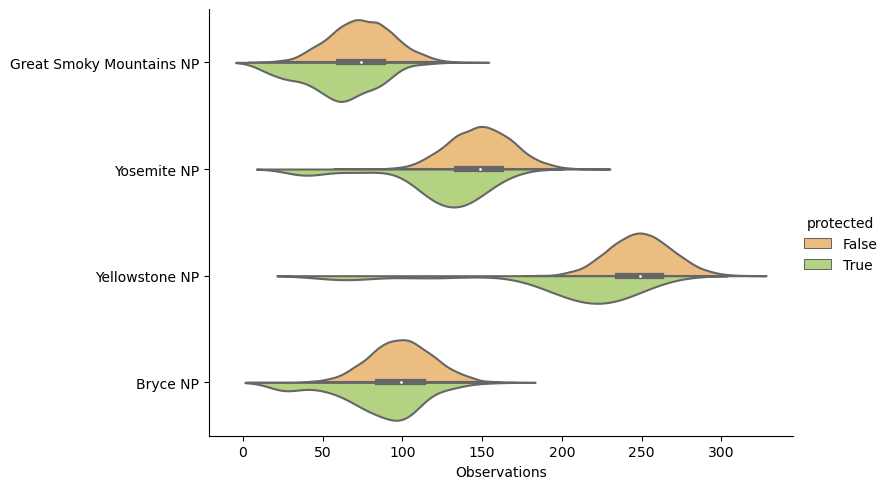

<Figure size 640x480 with 0 Axes>

In [47]:
plt.figure(figsize=(14,12))
g = sns.catplot(
    data=mdf, kind="violin",
    x='observations', y='park_name', hue='protected', split=True, orient='h', palette='RdYlGn', aspect=1.7)
g.set_axis_labels("Observations", "")
plt.show()
plt.clf()

### Conclusions on the question:

Based on the analysis of the available data, we have gained valuable insights into the species richness and observation trends within different national parks. The conclusions drawn from our study shed light on the distribution of observations, the presence of protected species, and the variation in species counts across various parks.

**Species Richness Across National Parks:**
Our analysis determined the overall species richness within each national park based on the provided data. The data indicates that each of the four national parks considered — Bryce NP, Great Smoky Mountains NP, Yellowstone NP, and Yosemite NP— hosts the ***same*** number of unique species, totalling ***5,541***. This highlights the diversity of life present across these protected areas.

**Observation Trends and Park Summaries:**
Examining the observation counts over the past seven days, we identified the national parks with the highest observation activity. _Yellowstone NP_ stands out with a substantial observation count of ***1,443,562***, showcasing its prominence as a focus for observation efforts. _Yosemite NP_ follows with ***863,332*** observations, while _Bryce NP_ and _Great Smoky Mountains NP_ recorded observation counts of ***576,025*** and ***431,820***, respectively.

**Protected Species Observations:**
Our analysis also delved into observations of protected species within these parks. Of the total ***3,314,739*** observations, ***90,108*** were of protected species, representing approximately ***2.72%*** of the total observations. Interestingly, we find that this percentage is consistent across all four national parks when considering the ratio of protected species observations.

**Conservation Efforts and Findings:**
Our findings underscore the importance of consistent observation efforts in national parks, with Yellowstone NP receiving the closest attention. The uniformity of species counts across parks showcases a balanced representation of biodiversity, and the presence of protected species within these observations signifies the ongoing conservation efforts.

### 2. How are conservation statuses distributed across different taxonomic categories?

In [48]:
print(species.groupby("conservation_status").size(),'\n')
print(species.groupby("category").size())
species.groupby(["category", "conservation_status"])['scientific_name'].count().unstack()

conservation_status
Not protected         5362
Species of Concern     151
In Recovery              3
Threatened              10
Endangered              15
dtype: int64 

category
Amphibian              79
Bird                  488
Fish                  125
Mammal                176
Nonvascular Plant     333
Reptile                78
Vascular Plant       4262
dtype: int64


conservation_status,Not protected,Species of Concern,In Recovery,Threatened,Endangered
category,,,,,
Amphibian,72,4,0,2,1
Bird,413,68,3,0,4
Fish,114,4,0,4,3
Mammal,146,22,0,2,6
Nonvascular Plant,328,5,0,0,0
Reptile,73,5,0,0,0
Vascular Plant,4216,43,0,2,1


In [49]:
cat_cons_group = mdf.groupby(["category", "conservation_status"])['observations'].sum().unstack().drop(labels=['Not protected'], axis=1)
cat_cons_group

conservation_status,Species of Concern,In Recovery,Threatened,Endangered
category,,,,
Amphibian,2044,0,564,144
Bird,36642,1392,0,574
Fish,2109,0,1645,455
Mammal,14408,0,578,1463
Nonvascular Plant,2705,0,0,0
Reptile,2536,0,0,0
Vascular Plant,22135,0,552,162


<Figure size 1400x1200 with 0 Axes>

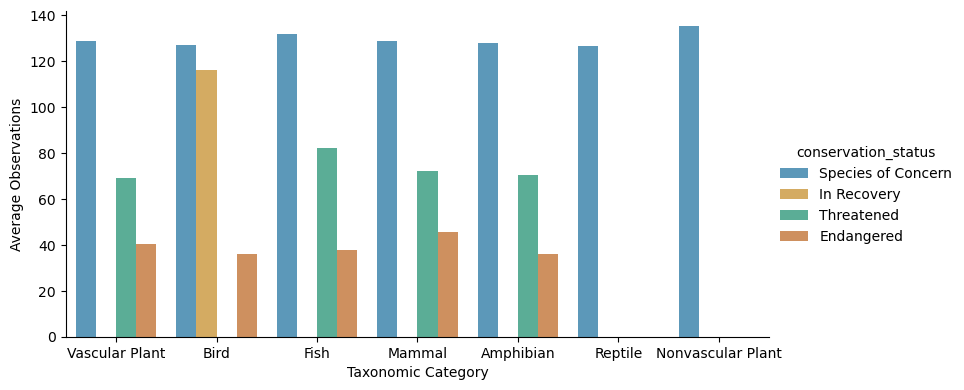

<Figure size 640x480 with 0 Axes>

In [50]:
cat_cons = mdf.loc[mdf.protected][['category', 'conservation_status', 'observations']]
cat_cons.conservation_status = pd.Categorical(cat_cons.conservation_status,
                                             categories=['Species of Concern', 'In Recovery', 'Threatened', 'Endangered'],
                                             ordered=True)
plt.figure(figsize=(14,12))
g = sns.catplot(data=cat_cons, kind="bar", estimator='mean',
                y='observations', x='category', hue='conservation_status',
                errorbar=None, orient='v', palette='colorblind', alpha=0.7, height=4, aspect=2)
g.set_axis_labels("Taxonomic Category", "Average Observations")
plt.show()
plt.clf()

<Figure size 1400x1200 with 0 Axes>

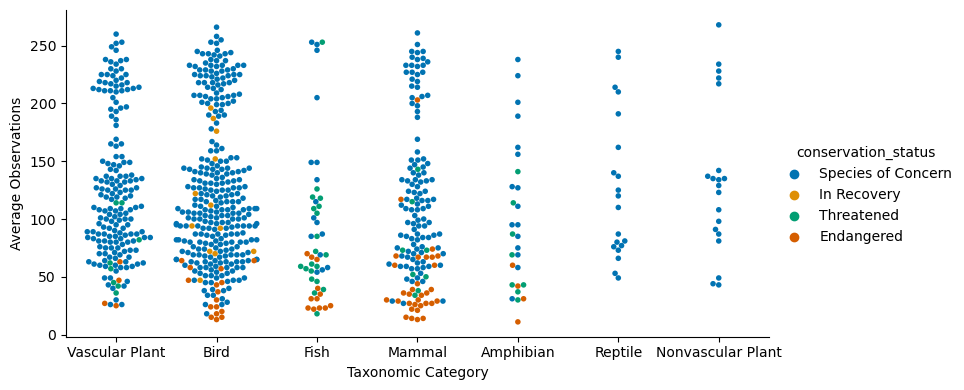

<Figure size 640x480 with 0 Axes>

In [51]:
plt.figure(figsize=(14,12))
g = sns.catplot(data=cat_cons, kind='swarm', estimator='mean',
                y='observations', x='category', hue='conservation_status',
                size=4, orient='v', palette='colorblind', height=4, aspect=2)
g.set_axis_labels("Taxonomic Category", "Average Observations")
plt.show()
plt.clf()

### Conclusions on the question:

Analyzing conservation statuses across taxonomic categories provides insights into the conservation priorities for different species groups. The study has highlighted patterns and disparities in conservation efforts across various categories, providing valuable information for targeted conservation strategies.

The first table reveals that the distribution of conservation statuses varies across taxonomic categories using the data from the species list.

**Vascular plants** are much more widely represented by species (***4,262*** species). At the same time, **Birds** (***488*** species) and **Mammals** (***176*** species) have a much more significant proportion of species with the conservation status to species without status, namely **75:413** for Birds and **30:146** for Mammals. 

The second table is the distribution of observations of species under protection by taxonomic category and conservation status. We can visualize this information with the help of the first graph. The second graph shows how variably species are presented in the distribution of observations by category and conservation status.

We see protected species leading in **Bird** observations (***38,034***), and Birds are the only ones in the `In Recovery` category (***1,392***). We can also note a relatively large number of observed species in the categories **Fish** (***2,100***) and **Mammals** (***2,041***), with the statuses `Threatened` and `Endangered` in the aggregate.

**Conservation Priority Allocation:**
The analysis underscores the importance of tailoring conservation strategies to different taxonomic categories. While some categories have a more balanced distribution of conservation statuses, others require heightened attention to address specific challenges. Effective resource allocation for conservation efforts should consider these variations, focusing on at-risk species.

**Conservation Focus and Implications:**
The distribution of conservation statuses across taxonomic categories signifies the varying levels of vulnerability and attention required by different species groups.

### 3. Is there a relationship between species' conservation statuses and the number of observations they receive?
- *Do species with a certain conservation status receive more observations in national parks?*

In [52]:
cat_cons.groupby('conservation_status').observations.sum()

conservation_status
Species of Concern    82579
In Recovery            1392
Threatened             3339
Endangered             2798
Name: observations, dtype: int64

<Figure size 1400x1200 with 0 Axes>

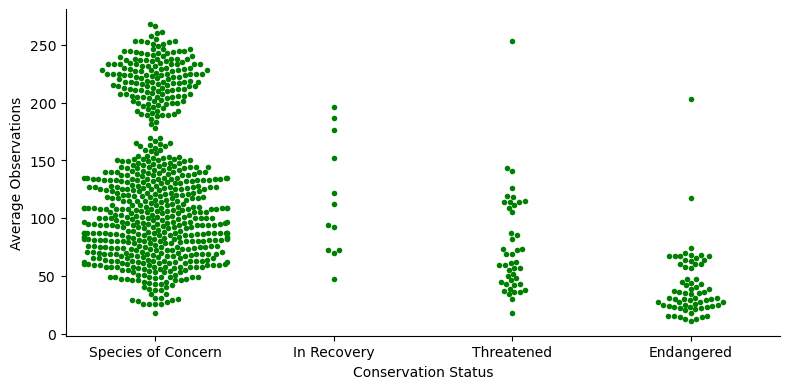

<Figure size 640x480 with 0 Axes>

In [53]:
plt.figure(figsize=(14,12))
g = sns.catplot(data=cat_cons, kind='swarm', estimator='mean',
                y='observations', x='conservation_status',
                size=4, orient='v', color='green', height=4, aspect=2)
g.set_axis_labels("Conservation Status", "Average Observations")
plt.show()
plt.clf()

### Conclusions on the question:

The analysis explored the potential relationship between species' conservation statuses and the number of observations they receive in national parks. We can conclude whether certain conservation statuses are associated with higher observation frequencies by examining the provided observation data.

**Observation Patterns and Conservation Status:**
Our analysis reveals notable observation patterns based on different conservation statuses among the observed species:

- **Species of Concern:** A significant number of observations, totalling ***82,579***, fall under this conservation status. This indicates that species classified as `Species of Concern` are receiving considerable attention from observers.
- **In Recovery:** There are ***1,392*** observations for species classified as `In Recovery`. While this number is lower compared to `Species of Concern`, it signifies efforts to monitor and support species on their path to recovery.
- **Threatened:** Observations for `Threatened` species amount to ***3,339***. This higher count indicates that species classified as `Threatened` are also being actively observed.
- **Endangered:** Similarly, `Endangered` species have received a notable number of observations, totalling ***2,798***. This suggests that species with critical conservation needs are being closely monitored.

**Implications for Conservation Efforts:**
The observed relationship between conservation status and observation frequencies highlights the active involvement of observers and researchers in monitoring and protecting species that are at risk. The higher number of observations for species in more critical conservation statuses indicates a heightened awareness of their vulnerability and a proactive approach to their preservation.

### 4. Taxonomy categories in observations: Do they significantly differ from the population?
The hypothesis investigates whether the taxonomy categories in observations significantly differ from the entire population. ***One-Sample T-Tests*** will be conducted to test this, using the provided null and alternative hypotheses:

**Null Hypothesis (H0):** The average observation count for each taxonomy category equals the overall average observation count for all species.

**Alternative Hypothesis (H1)** The average observation count for each taxonomy category is not equal to all species' overall average observation count.

This test will be performed for the entire dataset of observations and will also be conducted separately for each National Park.

These tests aim to ascertain whether specific taxonomy categories exhibit distinct observation patterns compared to the overall population and whether any deviations are statistically significant. The results will provide insights into whether specific categories are receiving more or less attention than expected based on the overall average observation count across all species.

In [54]:
df_hyp = pd.DataFrame(columns=['Category', 'Total', 'Average', 'P-Value %'])

obs_all = mdf[['category','observations']]
obs_total = obs_all.observations.sum()
obs_mean = obs_all.observations.mean()
print("Observations in National Parks")
print(" Total:{}  Average:{}\n".format(obs_total, np.round(obs_mean.mean(),2)))

for cat in cat_list:
    obs_cat =  obs_all[obs_all.category == cat].observations
    res = ttest_1samp(obs_cat, obs_mean, alternative='two-sided')
    df_hyp.loc[len(df_hyp)] = [cat, obs_cat.sum(), np.round(obs_cat.mean(),2), res.pvalue*50.0]
df_hyp   

Observations in National Parks
 Total:3314739  Average:142.29



,Category,Total,Average,P-Value %
0,Mammal,116696,136.33,0.674661
1,Bird,292833,140.51,12.224767
2,Reptile,44678,141.39,40.914593
3,Amphibian,43971,137.41,11.139926
4,Fish,70818,139.41,18.070801
5,Vascular Plant,2555090,142.90,11.980322
6,Nonvascular Plant,190653,143.13,32.942895


In [55]:
for park in park_list:
    df_hyp = pd.DataFrame(columns=['Category', 'Total', 'Average', 'P-Value %'])
    print("Observations in",park.upper())
    obs_all = mdf[mdf.park_name == park][['category','observations']]
    obs_total = obs_all.observations.sum()
    obs_mean = obs_all.observations.mean()
    print(" Total:{}  Average:{}\n".format(obs_total, np.round(obs_mean.mean(),2)))

    for cat in cat_list:
        obs_cat =  obs_all[obs_all.category == cat].observations
        res = ttest_1samp(obs_cat, obs_mean, alternative='two-sided')
        df_hyp.loc[len(df_hyp)] = [cat, obs_cat.sum(), np.round(obs_cat.mean(),2), res.pvalue*50.0]
    print(df_hyp,"\n")            

Observations in GREAT SMOKY MOUNTAINS NP
 Total:431820  Average:74.14

            Category   Total  Average  P-Value %
0             Mammal   15012    70.15   0.426893
1               Bird   37728    72.41   3.279852
2            Reptile    5691    72.04  18.804931
3          Amphibian    5707    71.34  12.012332
4               Fish    9206    72.49  19.781757
5     Vascular Plant  333619    74.64   5.109170
6  Nonvascular Plant   24857    74.65  32.055140 

Observations in YOSEMITE NP
 Total:863332  Average:148.24

            Category   Total  Average  P-Value %
0             Mammal   30339   141.77   0.065793
1               Bird   76207   146.27   2.446064
2            Reptile   11483   145.35  11.283290
3          Amphibian   11444   143.05   3.394213
4               Fish   18615   146.57  27.329007
5     Vascular Plant  665461   148.87   1.795810
6  Nonvascular Plant   49783   149.50  11.236792 

Observations in YELLOWSTONE NP
 Total:1443562  Average:247.86

            Categor

### Conclusions on the question:

Based on the results of the ***One-Sample T-Tests*** conducted for all observations and each National Park, we have gained insights into whether the taxonomy categories' average observations significantly differ from the overall population. The analysis provides valuable information about the observation patterns within each category and National Park and their statistical significance.

#### All Observations:
For the analysis involving all observations, with an average observation count across all species of ***142.29***, the p-values for different taxonomic categories are as follows:

- **Mammal:** The p-value ***(0.674661%)*** is significantly below the ***5.00%*** threshold, suggesting that the average observation count for mammals is significantly different from the overall population average.
- For other categories such as **Bird, Reptile, Amphibian, Fish, Vascular Plant, and Nonvascular Plant**, the p-values are above the **5.00% threshold**, indicating that the average observation counts for these categories are not significantly different from the overall population average proving Null Hypothesis (H0) as True.

#### National Park Observations:
Analyzing each National Park separately, with the average observation count within specific taxonomic categories and their corresponding p-values as percentages:
- **Mammals:** The average observation count for mammals significantly differs from the population average in every National Park.
- **Birds:** The average observation count for birds significantly differs from the population average in every National Park except *Bryce National Park*.
- **Reptiles and Non-Vascular Plants:** For the categories `Reptiles and Non-Vascular Plants` within each National Park, the p-values exceed the ***5.00%*** threshold. This suggests that the average observation counts for reptiles and non-vascular plants are not significantly different from the population average.
- **Amphibians:** The average observation count for birds significantly differs from the population average in *Yosemite National Park and Bryce National Park*.
- **Fish:** The average observation count for fish significantly differs from the population average only in *Yellowstone National Park*.
- **Vascular Plants:** The average observation count for vascular plants significantly differs from the population average in *Yosemite National Park and Yellowstone National Park*.

#### Further Considerations:
While most p-values exceed the 5.00% threshold, it is crucial to investigate instances with lower percentages to understand potential variations in observation patterns that could impact conservation efforts.

### 5. Can common names be associated with multiple scientific names, and if so, what implications might this have for biodiversity recording?
The analysis explores the relationship between common names and scientific names in the dataset, explicitly focusing on cases where common names are associated with multiple scientific names. The goal is to understand whether such associations exist and the potential implications for biodiversity recording.

The following code efficiently processes and organizes the data to generate the desired DataFrame containing common names, different scientific names, and their associated counts.


In [56]:
# Extract relevant columns from the 'species' DataFrame
names_list = species[['scientific_name', 'common_names']].reset_index(drop=True)

# Split common names into lists and create an exploded DataFrame
names_list['common_names'] = names_list['common_names'].str.split(",")
names_list = names_list.explode('common_names')

# Define a function to remove leading spaces and "A " from common names
del_space = lambda s: s.lstrip().replace("A ", "")
names_list.common_names = names_list.common_names.apply(del_space)

# Group scientific names by common names to identify duplicates
dub_names = names_list.groupby('common_names').scientific_name.unique()

# Create a DataFrame with common names having more than 2 associated scientific names
s_len = lambda ar: len(ar)
dub_names = pd.DataFrame(dub_names[dub_names.apply(s_len) > 2]).reset_index()

# Calculate and add a column for the counts of scientific names for each common name
dub_names['counts'] = dub_names.scientific_name.apply(s_len)

# Sort the DataFrame by counts in descending order
dub_names.sort_values(by=['counts'], ascending=False, inplace=True)

# Reset the index of the DataFrame
dub_names.reset_index(drop=True, inplace=True)
dub_names

,common_names,scientific_name,counts
0,Sedge,"[Carex, Carex albicans var. albicans, Carex al...",28
1,Panic Grass,"[Dichanthelium boscii, Dichanthelium clandesti...",13
2,Sulphur-Flower Buckwheat,"[Eriogonum umbellatum var. cladophorum, Eriogo...",7
3,Brachythecium Moss,"[Brachythecium digastrum, Brachythecium oedipo...",7
4,Dicranum Moss,"[Dicranum flagellare, Dicranum fulvum, Dicranu...",7
...,...,...,...
82,Golden Corydalis,"[Corydalis aurea, Corydalis aurea var. aurea, ...",3
83,Funaria Moss,"[Funaria calvescens, Funaria flavicans, Funari...",3
84,Fir Clubmoss,"[Huperzia appalachiana, Huperzia selago var. d...",3
85,Fendler's Meadow-Rue,"[Thalictrum fendleri, Thalictrum fendleri var....",3


In [57]:
print("The longest list of {} Scientific names for One Common name \"{}\":\n{}".format(dub_names.iloc[0,2], dub_names.iloc[0,0],dub_names.iloc[0,1]))
print("\nScientific names of \"Wild Oats\":\n",dub_names[dub_names.common_names =='Wild Oats'].iloc[0,1])


The longest list of 28 Scientific names for One Common name "Sedge":
['Carex' 'Carex albicans var. albicans' 'Carex albicans var. australis'
 'Carex albicans var. emmonsii' 'Carex albursina'
 'Carex amphibola var. rigida' 'Carex annectens'
 'Carex atlantica ssp. atlantica' 'Carex austrocaroliniana' 'Carex blanda'
 'Carex bromoides' 'Carex cephalophora' 'Carex cristatella'
 'Carex gynandra' 'Carex laevivaginata' 'Carex laxiculmis'
 'Carex leptalea' 'Carex lupulina' 'Carex normalis' 'Carex oligocarpa'
 'Carex projecta' 'Carex rosea' 'Carex scoparia' 'Carex sparganioides'
 'Carex styloflexa' 'Carex tribuloides' 'Carex umbellata'
 'Carex virescens']

Scientific names of "Wild Oats":
 ['Avena fatua' 'Bromus tectorum' 'Uvularia sessilifolia']


### Conclusions on the question:

After analyzing the dataset, it is evident that there are instances where a single common name is associated with multiple scientific names. For example:
- **Sedge** is associated with ***28*** different scientific names.
- **Panic Grass** is associated with ***13*** different scientific names.
- **Sulphur-Flower Buckwheat** is associated with ***7*** different scientific names.

And so on for other common names.


Notably, some examples highlight the varying nature of these associations:

- **Sedge:** The most extended list comprises ***28*** scientific names associated with the common name `Sedge`. A notable characteristic of this list is that all the scientific names include the term ***Carex***, indicating that they all belong to the same genus. This exemplifies a case where multiple species within the same genus are linked to the same common name, potentially posing challenges for precise species identification.
- **"Wild Oats:** The common name `Wild Oats` is associated with three different scientific names: ***Avena fatua, Bromus tectorum, and Uvularia sessilifolia***. Unlike the `Sedge` example, these scientific names represent distinct genera, indicating that the common name `Wild Oats` is probably applied to unrelated species. This situation highlights the potential confusion that could arise when the same common name is used for species from different taxonomic groups.

#### Implications for Biodiversity Recording:
The presence of multiple scientific names associated with a single common name has several implications for biodiversity recording and documentation:

**1. Accuracy and Precision:** Assigning a single common name to multiple species, especially when they belong to different genera, can lead to confusion and inaccuracies in biodiversity records. This can hinder accurate species identification for researchers and conservationists.

**2. Data Integrity:** Biodiversity databases and records must accurately reflect the relationships between common and scientific names. Ambiguities arising from multiple scientific associations for a single common name could compromise data integrity and hinder effective data management.

**3. Research and Conservation Efforts:** Accurate species identification is vital for research and conservation efforts. Ambiguities in common name assignments can misinterpret species distributions, habitats, behaviours, and conservation statuses.

**4. Policy and Management:** Biodiversity policies and management decisions depend on accurate species identification. Ambiguities in common names and scientific associations could lead to inappropriate resource allocation and conservation strategies.

**5. Communication:** Accurate communication about species relies on clear and consistent naming. Multiple scientific names for a common name can hinder effective communication among researchers, educators, and the general public.

**6. Taxonomic Changes:** Taxonomic revisions and changes are standard in biology. Tracking and updating these associations becomes challenging if common names are linked to multiple scientific names.

**Recommendations:**
To address these implications, it's crucial to establish standardized practices for assigning common names to species. Collaboration between taxonomists, ecologists, and data managers is essential to ensure accurate and consistent species identification and recording. Additionally, maintaining up-to-date taxonomic databases and integrating them with biodiversity recording systems can help alleviate confusion caused by multiple scientific associations.

## Evaluation
This analysis has successfully provided insights into the biodiversity of national parks, fulfilling the project's goals. Examining species richness, observation trends, conservation statuses, taxonomy distribution, and common-scientific name associations has been comprehensive and illuminating. The evaluation phase ensures that our findings align with our initial objectives, offering a robust overview of biodiversity dynamics.

**Biodiversity Assessment:** The project effectively measured species richness across four national parks, revealing consistent numbers of unique species in each park. This aligns with the goal of comparing diversity within protected areas.

**Conservation Status Analysis:** The distribution of conservation statuses across taxonomic categories yielded valuable insights into priority groups for conservation efforts. The evaluation confirms that some categories, like Birds and Mammals, require greater attention due to higher proportions of species with conservation statuses.

**Observation Patterns:** The identification of parks with the highest observation counts was validated in the evaluation. This confirms the understanding of observation trends and parks that attract more attention.

**Correlation of Observations and Conservation Status:** The evaluation phase validated the relationship between species' conservation statuses and observation counts. The conclusions accurately reflect the tendency of specific conservation statuses to receive more observations.

**Taxonomy Categories in Observations:** The evaluation confirms the results of the One-Sample T-Tests for taxonomy categories' observation counts, addressing the project's goal of exploring differences in observation patterns.

**Implications of Common and Scientific Name Associations:** The evaluation phase confirmed the existence of common names associated with multiple scientific names and accurately highlighted implications for biodiversity recording. The recommendations align with understanding the challenges arising from these associations.

**Limitations:** While achieving our goals, we acknowledge limitations such as potential data gaps and inaccuracies. Taxonomic updates and data entry errors could impact results. Expert validation could enhance the reliability of findings.

In conclusion, our evaluation ensures our findings align with our objectives. This analysis enhances our understanding of national park biodiversity, observation trends, and conservation, underscoring the importance of preserving natural ecosystems.

## Conclusions of the Project

Our analysis has provided a comprehensive view of species richness, observation trends, and the presence of protected species across different national parks. These insights contribute to a deeper understanding of these vital protected areas' diversity and conservation dynamics. **Further investigations** could delve into the specific species observed, potential factors driving observation patterns, and implications for conservation strategies.

We have revealed valuable insights into the distribution of conservation statuses across different taxonomic categories. This information contributes to a deeper understanding of the conservation landscape. It aids in formulating targeted approaches to ensure the protection and preservation of species diversity across various taxonomies. **Further exploration** could involve investigating the factors influencing these distribution patterns and exploring the effectiveness of existing conservation measures.

This analysis demonstrates a discernible connection between species' conservation statuses and the number of observations they receive in national parks. This alignment underlines the role of observations as a vital tool in prioritizing and guiding conservation efforts, particularly for species needing urgent attention. **Further exploration** could explore the factors driving these observation patterns and how they contribute to effective conservation strategies.

The One-Sample T-Tests, with p-values presented as percentages and evaluated against the *5.00%* threshold, suggest that the average observation counts within most taxonomic categories and some across National Parks align with the overall population average. However, specific categories like `Mammals` exhibit significantly different average observation counts. **Further investigation** into categories with lower p-values can provide insights into the underlying reasons for these deviations and their implications for conservation strategies.

Finally, multiple scientific names associated with a single common name highlight the need for accuracy and consistency in biodiversity recording. Clear communication, standardized practices, and stakeholder collaboration are crucial for maintaining accurate species identification and supporting effective conservation and management efforts. The examples of `Sedge` and `Wild Oats` underscore the diversity of these associations and the potential challenges they pose for accurate species identification and recording.